# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_api_key = "f6d978171a47f5bce5d1e68eb6bb9dcf"

In [5]:
#city = "London"

In [6]:
requests.get(f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}").json()

{'coord': {'lon': -134.9692, 'lat': -23.1203},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 80.17,
  'feels_like': 81.46,
  'temp_min': 80.17,
  'temp_max': 80.17,
  'pressure': 1016,
  'humidity': 73,
  'sea_level': 1016,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 11.9, 'deg': 57, 'gust': 12.33},
 'rain': {'1h': 0.32},
 'clouds': {'all': 3},
 'dt': 1616458172,
 'sys': {'country': 'PF', 'sunrise': 1616425465, 'sunset': 1616468923},
 'timezone': -32400,
 'id': 4030556,
 'name': 'Rikitea',
 'cod': 200}

In [7]:
url = f'http://api.openweathermap.org/data/2.5/weather&appid={weather_api_key}+?={city}'

#counter

number = 1

#variables

city_name = []
long = []
lat = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
date = []

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    try:
        city_data = requests.get(f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}").json()
        city_name.append(city_data['name'])
        long.append(city_data['coord']['lon'])
        lat.append(city_data['coord']['lat'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        date.append(city_data['dt'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

Beginning Data Retrieval
------------------------
City number 1 of 607 complete. | Added yessentukskaya
City number 2 of 607 complete. | Added vaini
City number 3 of 607 complete. | Added barrow
City number 4 of 607 complete. | Added punta arenas
City number 5 of 607 complete. | Added ardakan
City number 6 of 607 complete. | Added san jose de ocoa
City number 7 of 607 complete. | Added saskylakh
City number 8 of 607 complete. | Added rikitea
City number 9 of 607 complete. | Added pevek
City number 10 of 607 complete. | Added norman wells
City number 11 of 607 complete. | Added karratha
City number 12 of 607 complete. | Added albany
City number 13 of 607 complete. | Added katsuura
City number 14 of 607 complete. | Added hermanus
City number 15 of 607 complete. | Added nakamura
City number 16 of 607 complete. | Added puerto ayora
City number 17 of 607 complete. | Added riviere-au-renard
Missing data in city number 18 of 607. | Skipping taolanaro
City number 19 of 607 complete. | Added kh

Missing data in city number 163 of 607. | Skipping guicheng
Missing data in city number 164 of 607. | Skipping barentsburg
City number 165 of 607 complete. | Added caravelas
City number 166 of 607 complete. | Added margate
City number 167 of 607 complete. | Added neyshabur
City number 168 of 607 complete. | Added chatham
City number 169 of 607 complete. | Added samarai
City number 170 of 607 complete. | Added dunedin
City number 171 of 607 complete. | Added sampit
City number 172 of 607 complete. | Added nizhniy odes
City number 173 of 607 complete. | Added hobyo
City number 174 of 607 complete. | Added kastamonu
City number 175 of 607 complete. | Added sonson
City number 176 of 607 complete. | Added murgab
City number 177 of 607 complete. | Added bluff
City number 178 of 607 complete. | Added tabou
City number 179 of 607 complete. | Added berlevag
City number 180 of 607 complete. | Added yerkoy
Missing data in city number 181 of 607. | Skipping shchelyayur
City number 182 of 607 compl

City number 322 of 607 complete. | Added saint-georges
City number 323 of 607 complete. | Added miri
City number 324 of 607 complete. | Added kosh-agach
City number 325 of 607 complete. | Added westport
Missing data in city number 326 of 607. | Skipping sorvag


KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': long,
                            'Temperature': max_temp,
                            'Humidity': humidity,
                            'Cloudiness': clouds,
                            'Wind Speed': wind_speed})

pd.DataFrame.to_csv(city_df, 'city_data.csv')

city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Yessentukskaya,44.0328,42.8813,35.6,93,90,17.90
1,Vaini,-21.2000,-175.2000,80.6,78,75,8.05
2,Barrow,71.2906,-156.7887,-9.4,64,20,6.91
3,Punta Arenas,-53.1500,-70.9167,51.8,71,75,6.91
4,Ardakān,32.3100,54.0175,55.4,16,0,2.30


In [9]:
output_file = city_df.to_csv ('output_file.csv', index = None, header=True)
city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Yessentukskaya,44.0328,42.8813,35.6,93,90,17.90
1,Vaini,-21.2000,-175.2000,80.6,78,75,8.05
2,Barrow,71.2906,-156.7887,-9.4,64,20,6.91
3,Punta Arenas,-53.1500,-70.9167,51.8,71,75,6.91
4,Ardakān,32.3100,54.0175,55.4,16,0,2.30


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

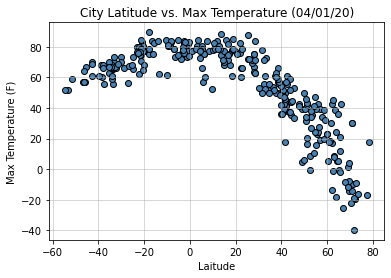

In [10]:
plt.scatter(city_df["Latitude"],city_df["Temperature"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

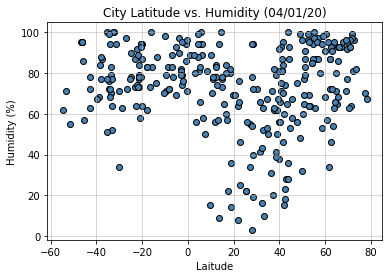

In [11]:
plt.scatter(city_df["Latitude"],city_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

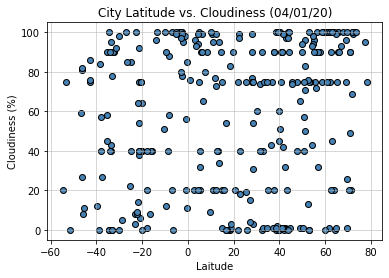

In [12]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

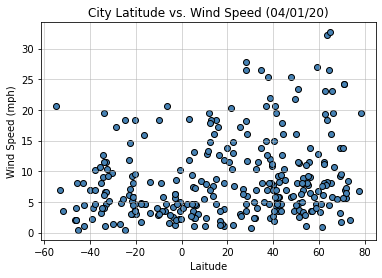

In [13]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [14]:
Northern_Hemisphere = city_df.loc[city_df["Latitude"] >= 0]
Southern_Hemisphere = city_df.loc[city_df["Latitude"] < 0]

In [28]:
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.median(),y.median()),fontsize=14,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8826405165021517
None


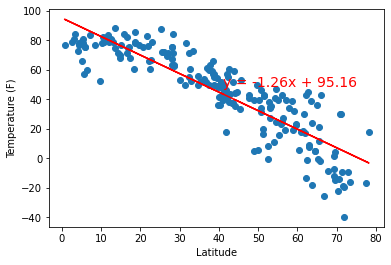

In [26]:
x = Northern_Hemisphere["Latitude"]
y = Northern_Hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_regression(x,y))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7524589423322313
None


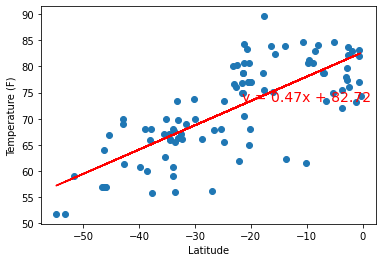

In [40]:
x = Southern_Hemisphere["Latitude"]
y = Southern_Hemisphere["Temperature"]
plt.ylabel("Temperature (F)")
print(linear_regression(x,y))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2057497060892223
None


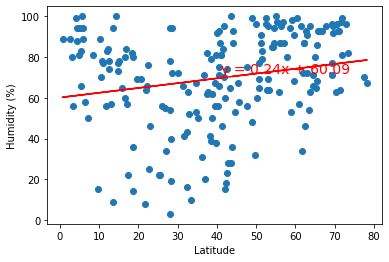

In [39]:
x = Northern_Hemisphere["Latitude"]
y = Northern_Hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_regression(x,y))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19722551561756554
None


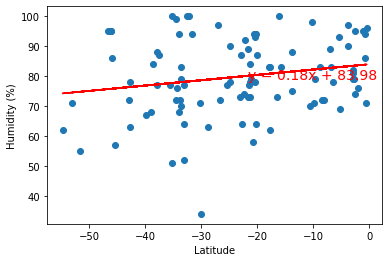

In [34]:
x = Southern_Hemisphere["Latitude"]
y = Southern_Hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_regression(x,y))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1715638289725293
None


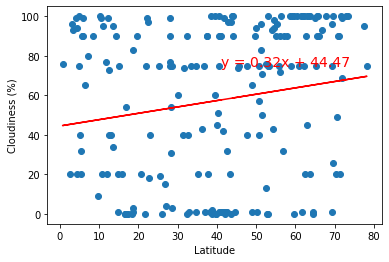

In [38]:
x = Northern_Hemisphere["Latitude"]
y = Northern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_regression(x,y))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2421963762360164
None


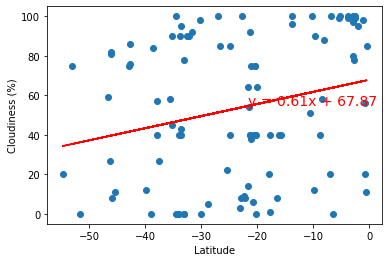

In [35]:
x = Southern_Hemisphere["Latitude"]
y = Southern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_regression(x,y))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12805782899554313
None


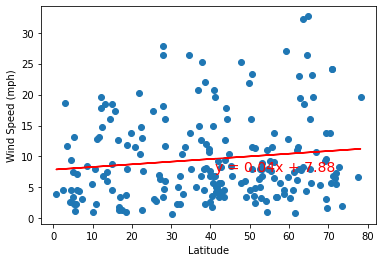

In [36]:
x = Northern_Hemisphere["Latitude"]
y = Northern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_regression(x,y))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09750270538575416
None


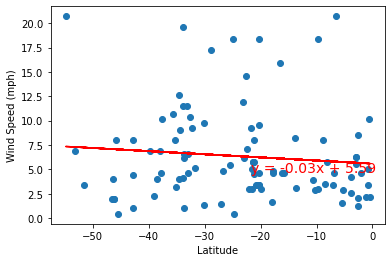

In [37]:
x = Southern_Hemisphere["Latitude"]
y = Southern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_regression(x,y))